<a href="https://colab.research.google.com/github/aashishcoder/Parkinson-Disease-Detection/blob/main/Parkinson's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.neural_network import MLPClassifier

In [6]:
df = pd.read_csv('/content/drive/MyDrive/contents/parkinsons.csv')
df.head(100)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,phon_R01_S22_5,157.447,163.267,149.605,0.00369,0.00002,0.00201,0.00197,0.00602,0.03272,...,0.05439,0.01018,21.693,1,0.447285,0.705658,-6.247076,0.180528,2.344348,0.164916
96,phon_R01_S22_6,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,...,0.05417,0.00852,22.663,1,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
df.shape

(195, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Checking for data imbalance **

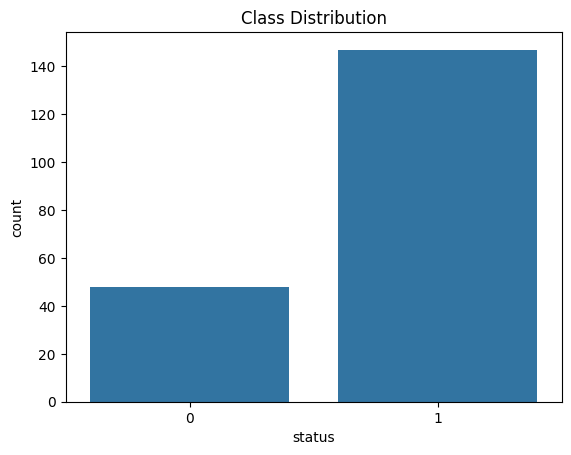

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='status', data=df)
plt.title('Class Distribution')
plt.show()

In [14]:
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)

In [22]:
print(pd.Series(Y_train_balanced).value_counts())

status
1    115
0    115
Name: count, dtype: int64


We will train the KNN classifier on the balanced data

**Initializing KNN classifier **

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(X_train_balanced, Y_train_balanced)

KNeighborsClassifier()

In [25]:
Y_pred = knn.predict(X_test_scaled)

In [26]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[ 6  1]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.97      0.88      0.92        32

    accuracy                           0.87        39
   macro avg       0.78      0.87      0.81        39
weighted avg       0.90      0.87      0.88        39


Accuracy Score: 0.8717948717948718


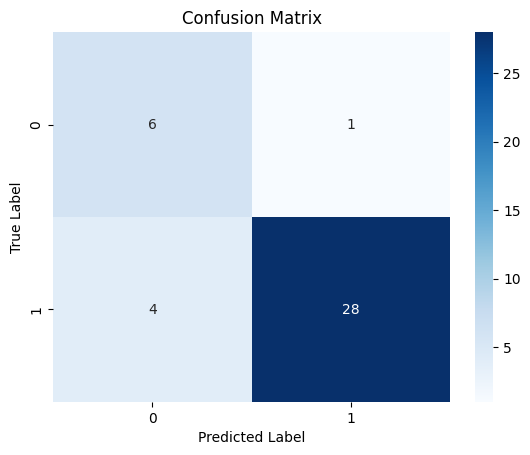

In [27]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


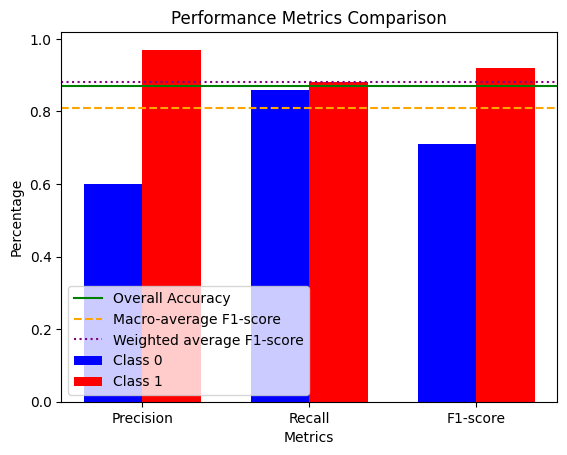

In [28]:
# Data for the metrics
class_0_metrics = {'Precision': 0.60, 'Recall': 0.86, 'F1-score': 0.71}
class_1_metrics = {'Precision': 0.97, 'Recall': 0.88, 'F1-score': 0.92}
overall_accuracy = 0.87
macro_avg_f1 = 0.81
weighted_avg_f1 = 0.88

# X-axis categories
categories = list(class_0_metrics.keys())

# Y-axis values
class_0_values = [class_0_metrics[cat] for cat in categories]
class_1_values = [class_1_metrics[cat] for cat in categories]

# Plotting the grouped bar chart
bar_width = 0.35
index = range(len(categories))

fig, ax = plt.subplots()
bar1 = ax.bar(index, class_0_values, bar_width, label='Class 0', color='blue')
bar2 = ax.bar([i + bar_width for i in index], class_1_values, bar_width, label='Class 1', color='red')

# Adding horizontal lines for overall accuracy, macro-average F1-score, and weighted average F1-score
ax.axhline(y=overall_accuracy, color='green', linestyle='-', label='Overall Accuracy')
ax.axhline(y=macro_avg_f1, color='orange', linestyle='--', label='Macro-average F1-score')
ax.axhline(y=weighted_avg_f1, color='purple', linestyle=':', label='Weighted average F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

Here We Achieved an Accuracy of 87.18 %. Using KNN Classifier.

NOW USING RANDOM FOREST CLASSIFIER


In [33]:
rf = RandomForestClassifier()
rf.fit(X_train_balanced, Y_train_balanced)

RandomForestClassifier()

In [34]:
y_pred = rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8717948717948718


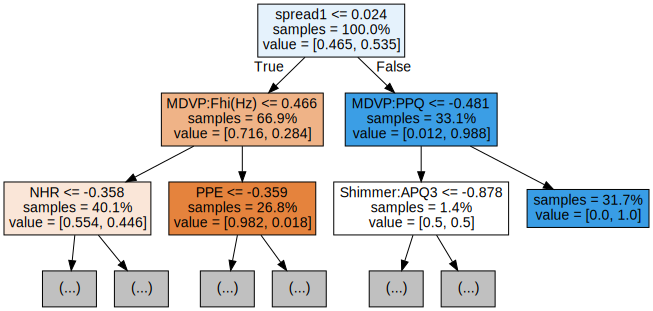

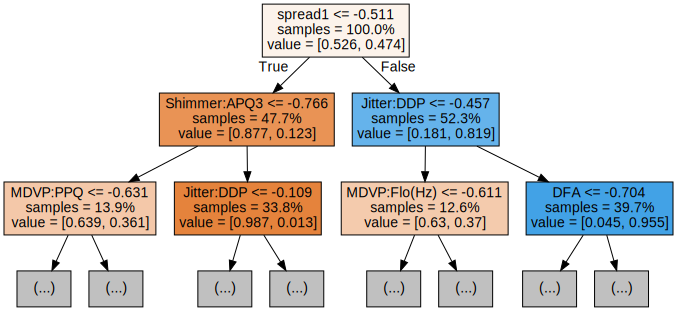

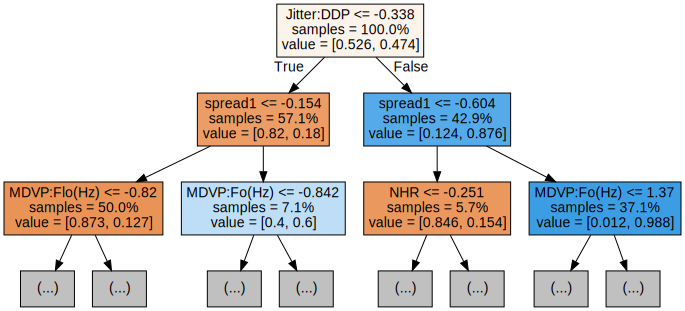

In [37]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 and blue indicating majority 1. The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

The variable name and value used for splitting
The % of total samples in each split
The % split between classes in each split

In [39]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_balanced, Y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db33cc38520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db33cc38850>})

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [40]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 267}


Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives(bottom left)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


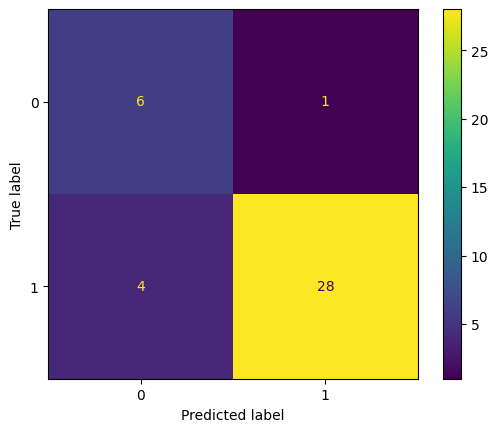

In [44]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Now, we evaluate the best model with accuracy, precision, and recall.

In [46]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8717948717948718
Precision: 0.9655172413793104
Recall: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Now we plot the importance of each feature, using the model’s internal score to find the best way to split the data within each decision tree.




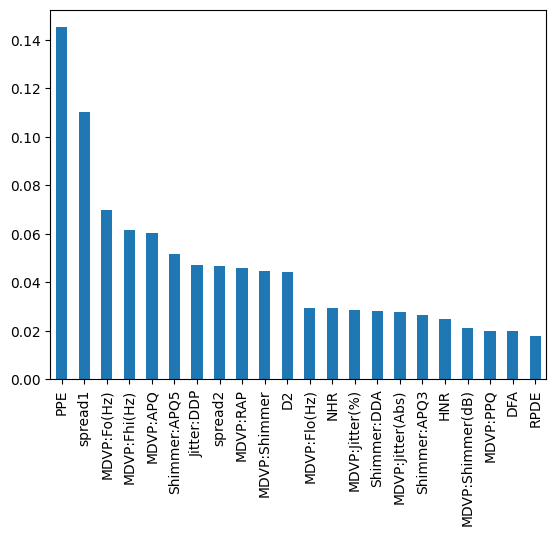

In [47]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();